In [2]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense,TimeDistributed, Bidirectional, Flatten
from keras.layers import BatchNormalization
from sklearn.model_selection import KFold 

In [36]:
DRUNK_PATH = Path('./Dataset/step3_result/drunk/')
NONDRUNK_PATH = Path('./Dataset/step3_result/non_drunk/')
# all_drunk_dataset = pd.read_csv('./Dataset/step3_result/concatenated/drunk.csv')
# all_nondrunk_dataset = pd.read_csv('./Dataset/step3_result/concatenated/nondrunk.csv')

In [37]:
# Creating a merged Drunk and Non-drunk dataframe seperately

all_drunk_dataset = []
all_nondrunk_dataset = []

for instance in os.scandir(DRUNK_PATH): 
    instance_path = instance.path
    dataset = pd.read_csv(instance_path, index_col=0)
    dataset.index = pd.to_datetime(dataset.index)
    dataset = dataset.drop(columns='check')
    all_drunk_dataset.append(dataset)

for instance in os.scandir(NONDRUNK_PATH): 
    instance_path = instance.path
    dataset = pd.read_csv(instance_path, index_col=0)
    dataset.index = pd.to_datetime(dataset.index)
    dataset = dataset.drop(columns='check')
    all_nondrunk_dataset.append(dataset)

In [38]:
# Data manipulation into interval of 3 seconds
X = []
y = []
WINDOW_SIZE = 30
# sum1 = 0
# sum2 = 0

for i in range (len(all_drunk_dataset)):
    df = all_drunk_dataset[i].to_numpy()
    # print(len(df))
    # sum1 += len(df)
    for j in range (0,len(df) - WINDOW_SIZE):
        rows = [a for a in df[j:j+WINDOW_SIZE]]
        X.append(rows)
        y.append(1)
        
# print('===========================================')

for i in range (len(all_nondrunk_dataset)):
    df = all_nondrunk_dataset[i].to_numpy()
    # print(len(df))
    # sum2 += len(df)
    for j in range (0,len(df) - WINDOW_SIZE):
        rows = [a for a in df[j:j+WINDOW_SIZE]]
        X.append(rows)
        y.append(0)

# print('===========================================')
# print(sum1, sum2)

print(np.shape(X),np.shape(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
print(np.shape(X_train),np.shape(y_train))
# print(np.shape(X_val),np.shape(y_val))
print(np.shape(X_test),np.shape(y_test))

(4309, 30, 584) (4309,)
(3447, 30, 584) (3447,)
(862, 30, 584) (862,)


In [39]:
# # Data manipulation from regular train test split
drunk_df = pd.read_csv('./Dataset/step3_result/concatenated/drunk.csv')
nondrunk_df = pd.read_csv('./Dataset/step3_result/concatenated/nondrunk.csv')

drunk_df = drunk_df.dropna(axis=0)
nondrunk_df = nondrunk_df.dropna(axis=0)

y_drunk = drunk_df['check']
X_drunk = drunk_df.drop(columns='check')
X_drunk = X_drunk.drop(columns=X_drunk.columns[0])

y_nondrunk = nondrunk_df['check']
X_nondrunk = nondrunk_df.drop(columns='check')
X_nondrunk = X_nondrunk.drop(columns=X_nondrunk.columns[0])

X_drunk, y_drunk = X_drunk[:2500], y_drunk[:2500]
X_nondrunk, y_nondrunk = X_nondrunk[:2500], y_nondrunk[:2500]

X_train_drunk, X_test_drunk, y_train_drunk, y_test_drunk = train_test_split(X_drunk, y_drunk, test_size=0.2)
# X_train_drunk, X_val_drunk, y_train_drunk, y_val_drunk = train_test_split(X_train_drunk, y_train_drunk, test_size=0.25)

X_train_nondrunk, X_test_nondrunk, y_train_nondrunk, y_test_nondrunk = train_test_split(X_nondrunk, y_nondrunk, test_size=0.2)
# X_train_nondrunk, X_val_nondrunk, y_train_nondrunk, y_val_nondrunk = train_test_split(X_train_nondrunk, y_train_nondrunk, test_size=0.25)

X_train = pd.concat([X_train_drunk, X_train_nondrunk])
X_test = pd.concat([X_test_drunk, X_test_nondrunk])
# X_val = pd.concat([X_val_drunk, X_val_nondrunk])
y_train = pd.concat([y_train_drunk, y_train_nondrunk])
y_test = pd.concat([y_test_drunk, y_test_nondrunk])
# y_val = pd.concat([y_val_drunk, y_val_nondrunk])

print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))
print(y_train.describe(), y_test.describe())
# # print(X_train.describe())
# # print(X_test.describe())
# # print(X_val.describe())
# # y_train.describe()

(4000, 584)
(4000,)
(1000, 584)
(1000,)
count    4000.000000
mean        0.500000
std         0.500063
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: check, dtype: float64 count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: check, dtype: float64


In [40]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense,TimeDistributed, Bidirectional, Flatten
# from keras.layers import BatchNormalization
# from sklearn.model_selection import KFold 

# # kfold = KFold(n_splits=5, shuffle=False,random_state=None)
# cvscores = []

# # for train, test in kfold.split(X_input, y_input):
# #     print(train)
# #     print(test)
# #     X_train,Y_train = X_input[train], y_input[train]
# #     X_test, Y_test = X_input[test], y_input[test]
    

# #     # print(np.shape(X_train),np.shape(X_test))
# #     X_train= (np.reshape(np.array(X_train),(80,50,584)))
# #     Y_train= (np.reshape(np.array(Y_train),(80,50,1)))
    
# #     X_test= (np.reshape(X_test,(20,50,584)))
# #     Y_test= (np.reshape(Y_test,(20,50,1)))

# #     model = Sequential()
    
# #     model.add(BatchNormalization(input_shape=(50,584)))
# #     model.add((LSTM(50,input_shape=(50,584),activation='tanh',return_sequences=True)
# #                             ))
# #     model.add(TimeDistributed(Dense(1,activation='sigmoid')))
    
# #     model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['acc'])
# #     model.fit(X_train, Y_train, epochs=100, batch_size=500, verbose=1)
# #     scores = model.evaluate(X_test, Y_test, verbose=1)
# #     print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# #     cvscores.append(scores[1] * 100)
    

# # X_train,Y_train = X_input[:4000], y_input[:4000]
# # X_test, y_test = X_input[4000:], y_input[4000:]

# X_train, y_train = X_train[:4000], y_train[:4000]
# X_test, y_test = X_test[:1000], y_test[:1000]

# X_train = X_train.to_numpy()
# y_train = y_train.to_numpy()
# X_train = X_train.reshape(4,1000,584)
# y_train = y_train.reshape(4,1000,1)
# print(np.shape(X_train),np.shape(X_test))

# model = Sequential()

# model.add(BatchNormalization(input_shape=(1000,584)))
# model.add((LSTM(64,input_shape=(1000, 584), activation='tanh',return_sequences=True)))
# # model.add(LSTM(units=128))
# model.add(TimeDistributed(Dense(1,activation='sigmoid')))

# model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=50, batch_size=1000, verbose=1)

In [5]:
from Step_4_MLmodels.PrepareDatasetForLearning import PrepareDatasetForLearning
prepare = PrepareDatasetForLearning()
FOLDER_PATH = Path('./Dataset/3. Features Extracted')
train_X, train_y, test_X, test_y, val_X, val_y = prepare.split_normal_dataset(FOLDER_PATH, val_size=0)
train_X = np.array(train_X)
train_y = np.array(train_y)
test_X = np.array(test_X)
test_y = np.array(test_y)
val_X = np.array(val_X)
val_y = np.array(val_y)

Successfully splitting the dataset, here is the information:
X_train shape:  (3503, 584)
y_train shape:  (3503,)
X_test shape:  (876, 584)
y_test shape:  (876,)
X_val shape:  (0,)
y_val shape:  (0,)
----------------------------------------------------------


In [10]:
from Step_4_MLmodels.LearningAlgorithms import ClassificationAlgorithms
learner = ClassificationAlgorithms()
def lstm(X_train_input, y_train_input, X_test_input):
    depth, base = learner.find_depth_and_base(np.shape(X_train_input)[0], np.shape(X_test_input)[0])
    X_train, y_train = X_train_input[:depth*base], y_train_input[:depth*base]
    X_test= X_test_input[:base]

    X_train = X_train.reshape(depth,base,np.shape(X_train_input)[1])
    y_train = y_train.reshape(depth,base,1)
    print(np.shape(X_train),np.shape(X_test))

    model = Sequential()
    model.add(BatchNormalization(input_shape=(1000,584)))
    model.add((LSTM(64,input_shape=(1000, 584), activation='tanh',return_sequences=True)))
    # model.add(LSTM(units=128))
    model.add(TimeDistributed(Dense(1,activation='sigmoid')))
    model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=50, batch_size=1000, verbose=1)
    
    class_test_y = (model.predict(X_test) > 0.5).astype("int32")
    class_test_y = class_test_y.reshape(1000,1)

    return class_test_y

In [13]:
print(np.shape(train_X)[0], np.shape(test_X)[0])
depth, base = learner.find_depth_and_base(np.shape(train_X)[0], np.shape(test_X)[0])
test_X = test_X[:base]
test_y = test_y[:base]
test_X = test_X.reshape(1,base,np.shape(test_X)[1])
test_y = test_y.reshape(1,base,1)
class_test_y = lstm(X_train, y_train, X_test)
y_test = y_test.reshape(base,1)
y_test = np.ravel(y_test)
class_test_y = np.ravel(class_test_y)

KeyboardInterrupt: 

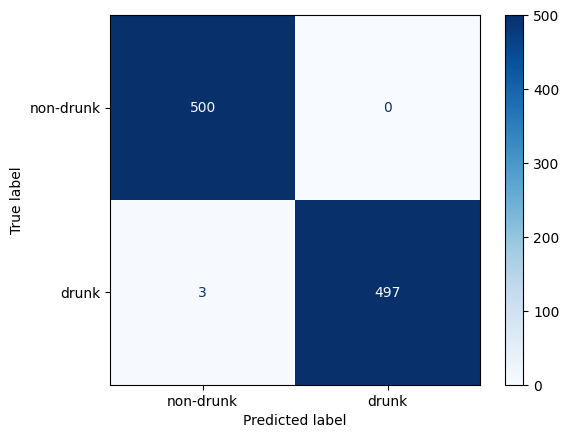

Accuracy: 0.997
Precision: 1.0
Recall:  0.994
F1 Score:  0.9969909729187563


In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


confusionmatrix_rf_final = confusion_matrix(y_test, class_test_y, labels=[0,1])
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusionmatrix_rf_final, display_labels = ["non-drunk", "drunk"])
  
cm_display.plot(cmap="Blues")
plt.show()
cm_display.figure_.savefig('lstm_confusion_matrix.png')
print("Accuracy:", accuracy_score(y_test, class_test_y))
print("Precision:" , precision_score(y_test, class_test_y))
print("Recall: ", recall_score(y_test, class_test_y))
print("F1 Score: ", f1_score(y_true=y_test, y_pred=class_test_y))

In [45]:
model.save_weights('./final_lstm_model_BCI.h5')